# Question 1 (1.5 point): 

Draw scatterplots and heatmap for the datasets named “Assignment-2-Scatterplot1.csv” and “Assignment-2-Scatterplot-2.csv”. In both cases, give a quick description of the distribution of the data points and explain which visualization (scatterplot or heat map) is most appropriate.

### 1. Assignment-2-Scatterplot1.csv

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
A21 = pd.read_csv('Assignment-2-Scatterplot-1.csv')

In [33]:
import ipywidgets as widgets

#### Scatter Plot

/Users/jiaqiwang/opt/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


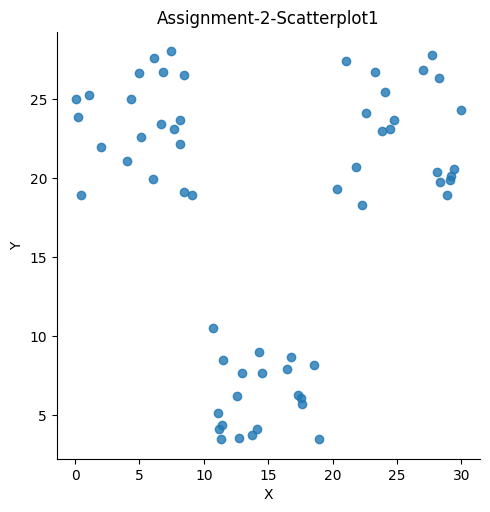

In [2]:
sns.lmplot(x='X', y='Y', data=A21, fit_reg=False) 
plt.title('Assignment-2-Scatterplot1')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Heat Map

<Axes: xlabel='X', ylabel='Y'>

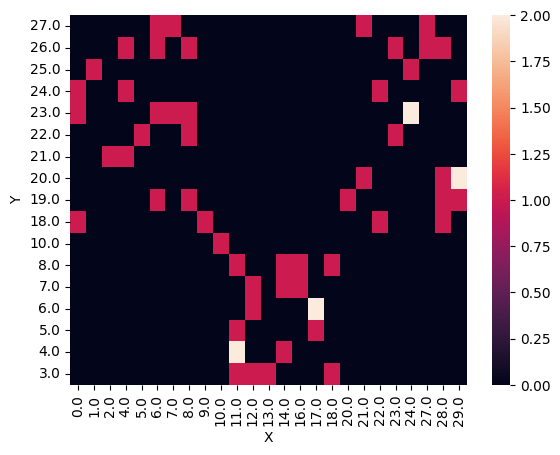

In [3]:
A21_floor = A21.apply(np.floor)
pivot_df = A21_floor.pivot_table(index='Y', columns='X', aggfunc='size', fill_value=0)
sns.heatmap(pivot_df[::-1])

Both the heatmap and the scatter plot shows the data gathering in three sections. From my perspective, I think the scatter plot may be more clear in this case, indicating a grouping trend.

### 2. Assignment-2-Scatterplot-2.csv

In [4]:
A22 = pd.read_csv('Assignment-2-Scatterplot-2.csv')

#### scatter plot

/Users/jiaqiwang/opt/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


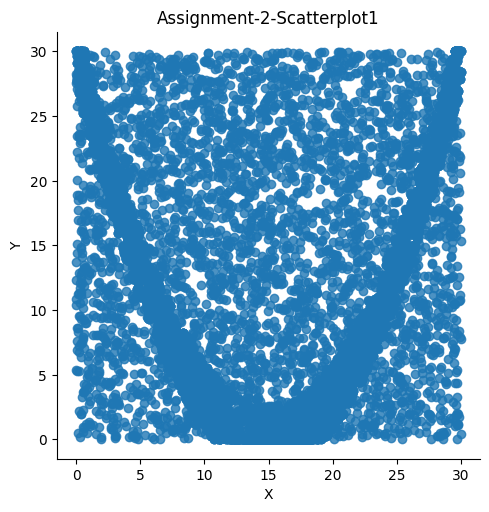

In [5]:
sns.lmplot(x='X', y='Y', data=A22, fit_reg=False) 
plt.title('Assignment-2-Scatterplot1')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Heat map

<Axes: xlabel='X', ylabel='Y'>

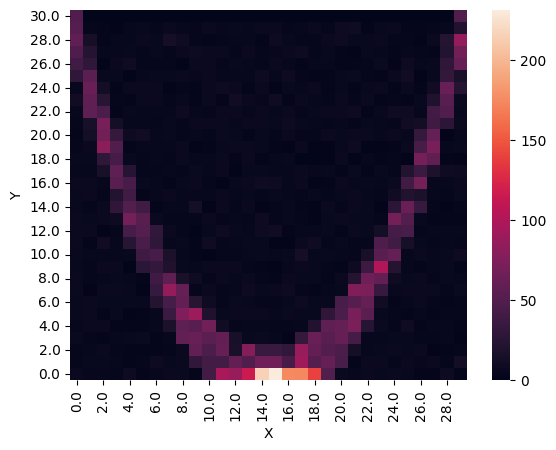

In [6]:
A22_floor = A22.apply(np.floor)
pivot_df = A22_floor.pivot_table(index='Y', columns='X', aggfunc='size', fill_value=0)
sns.heatmap(pivot_df[::-1])

For this data, the heatmap is better than the scatter plot as the heatmat shows a more clear pattern of the data, as the most data is gathered in the U shape ares.

### Question 2

Using the dataset named ASSISTments-sample.csv Download ASSISTments-sample.csv, draw the learning curves for the skills named “Box and Whisker” and “Inverse Relation”. Provide a short description/analysis of each curve.

In [7]:
ASSIST = pd.read_csv('ASSISTments-sample.csv')
ASSIST

,skill,problem_id,user_id,assignment_id,assistment_id,start_time,end_time,problem_type,original,correct,hint_count
0,Box and Whisker,36843,52451,175321,27833,44:28.0,47:00.5,algebra,1,0,0
1,Box and Whisker,36843,52451,175322,27833,50:35.1,50:51.8,algebra,1,1,0
2,Inverse Relations,8718,52451,175315,8718,28:11.1,29:20.4,choose_1,1,0,0
3,Inverse Relations,833,52451,175315,833,29:22.0,29:39.9,choose_1,1,0,0
4,Inverse Relations,882,52451,175315,882,30:21.4,30:55.6,choose_1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3230,Area Irregular Figure,77520,75361,232370,43144,43:14.3,43:36.9,algebra,1,1,0
3231,Area Irregular Figure,77452,75361,232370,43127,43:38.2,44:19.7,algebra,1,0,0
3232,Congruence,4468,75799,176419,4468,29:37.2,31:21.7,algebra,1,0,0
3233,Congruence,71770,76285,222898,41088,23:33.0,23:41.3,algebra,1,1,0


### 1. Learning curve for “Box and Whisker”

In [8]:
BW = ASSIST[ASSIST["skill"] == "Box and Whisker"]
BW = BW.sort_values(['user_id', 'start_time'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


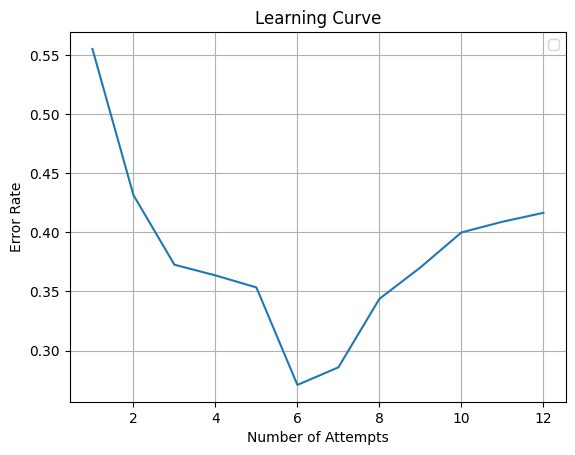

In [9]:
BW['cumulative_attempts'] = BW.groupby('user_id').cumcount() + 1
BW['cumulative_error_rate'] = 1-(BW.groupby('user_id')['correct'].cumsum()/BW['cumulative_attempts'])
error_rate = BW.groupby("cumulative_attempts")['cumulative_error_rate'].mean()
error_rate= pd.DataFrame(error_rate)
plt.plot(error_rate)
plt.title('Learning Curve')
plt.xlabel('Number of Attempts')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)

plt.show()

This learning curve shows a decreasing trend, but the curve drabatically raises again after the 6th attempt. It may due to the fact that the students may have different attempts, the current method may include those which do not have enough samples to make it valid. For example, if only one person tried to solve the problem in his 13th attempt and no body else in this data has tried 13th. If the person failed to solve it, the current method will show a 100% error rate which makes no sense.

In [10]:
num = BW.groupby("cumulative_attempts")["user_id"].count()
num

cumulative_attempts
1     279
2     205
3     127
4     110
5      73
6       8
7       7
8       4
9       3
10      2
11      2
12      1
Name: user_id, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


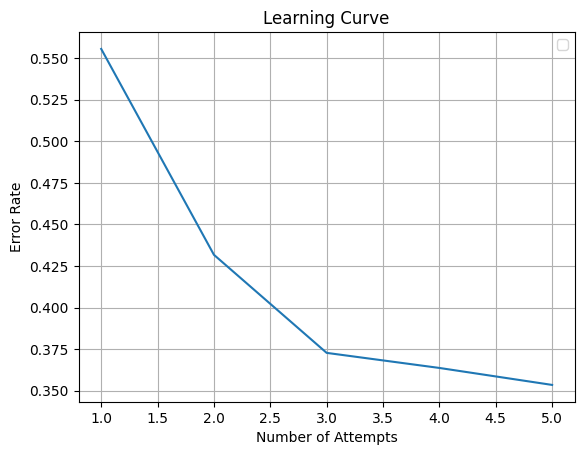

In [11]:
error_rate= pd.DataFrame(error_rate)
error_rate_adjusted= error_rate.head(5)
plt.plot(error_rate_adjusted)
plt.title('Learning Curve')
plt.xlabel('Number of Attempts')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)

plt.show()

The adjusted learning curve shows that stdudents is learning, but there is no enough data to show it reaches to a stable threshold.

### 2. Learning curve for “Inverse Relations”

In [12]:
BW = ASSIST[ASSIST["skill"] == "Inverse Relations"]
BW = BW.sort_values(['user_id', 'start_time'])
BW['cumulative_attempts'] = BW.groupby('user_id').cumcount() + 1
BW['cumulative_error_rate'] = 1-(BW.groupby('user_id')['correct'].cumsum()/BW['cumulative_attempts'])

In [13]:
num = BW.groupby("cumulative_attempts")["user_id"].count()
num

cumulative_attempts
1     344
2     251
3     184
4     154
5     110
6      60
7      35
8      18
9       8
10      3
Name: user_id, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


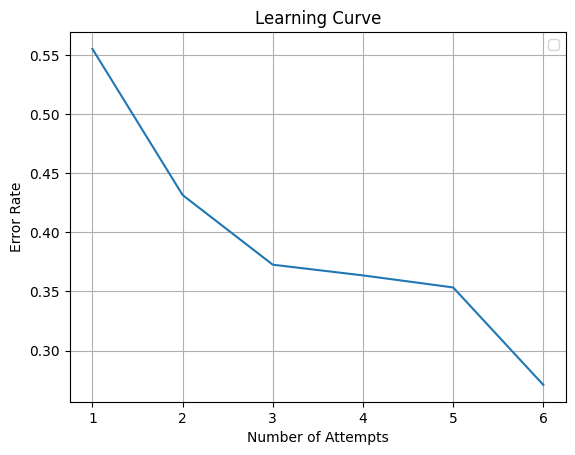

In [14]:
error_rate= pd.DataFrame(error_rate)
error_rate_adjusted= error_rate.head(6)
plt.plot(error_rate_adjusted)
plt.title('Learning Curve')
plt.xlabel('Number of Attempts')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)

plt.show()

The adjusted learning curve shows that stdudents is learning, but there is no enough data to show it reaches to a stable threshold.

### Question 3

Create a visualization using either the ASSISTments(this can include the features created during Weeks 2-3) or the Cognitive Tutor(this can include the features created in Assignment 1) datasets. You are not limited to visualization types seen in class. Feel free to use other types of visualization (for example histograms or pie charts). Explain the goal behind the visualization (what information are you trying to convey) as well as a quick analysis of the result of applying this visualization to the dataset.

In [27]:
ASSIST

,skill,problem_id,user_id,assignment_id,assistment_id,start_time,end_time,problem_type,original,correct,hint_count
0,Box and Whisker,36843,52451,175321,27833,44:28.0,47:00.5,algebra,1,0,0
1,Box and Whisker,36843,52451,175322,27833,50:35.1,50:51.8,algebra,1,1,0
2,Inverse Relations,8718,52451,175315,8718,28:11.1,29:20.4,choose_1,1,0,0
3,Inverse Relations,833,52451,175315,833,29:22.0,29:39.9,choose_1,1,0,0
4,Inverse Relations,882,52451,175315,882,30:21.4,30:55.6,choose_1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3230,Area Irregular Figure,77520,75361,232370,43144,43:14.3,43:36.9,algebra,1,1,0
3231,Area Irregular Figure,77452,75361,232370,43127,43:38.2,44:19.7,algebra,1,0,0
3232,Congruence,4468,75799,176419,4468,29:37.2,31:21.7,algebra,1,0,0
3233,Congruence,71770,76285,222898,41088,23:33.0,23:41.3,algebra,1,1,0


### 1. The correction rate for each skill

In [49]:
correct = ASSIST.groupby("skill")['correct'].sum().reset_index()
correct

,skill,correct
0,Area Irregular Figure,65
1,Box and Whisker,480
2,Congruence,456
3,Inverse Relations,474


In [50]:
total = ASSIST.groupby("skill")['correct'].count().reset_index()
total = total.rename(columns = {'correct':'total'})

perc_skill = pd.merge(total, correct, on='skill')
perc_skill["correctRate"]= perc_skill["correct"]/perc_skill["total"]
perc_skill

,skill,total,correct,correctRate
0,Area Irregular Figure,145,65,0.448276
1,Box and Whisker,821,480,0.584653
2,Congruence,1102,456,0.413793
3,Inverse Relations,1167,474,0.406170


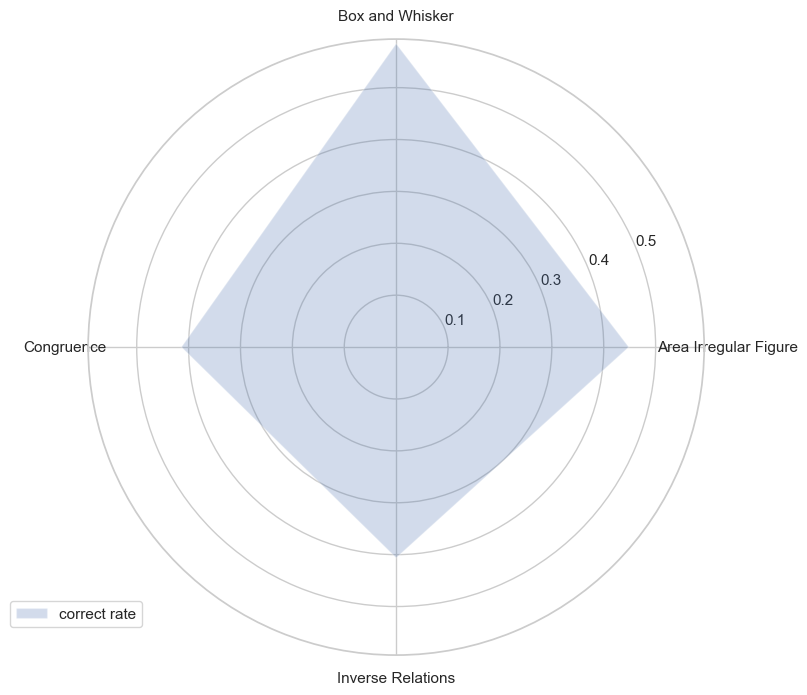

In [62]:
attribute_labels = perc_skill["skill"].tolist()
num_attributes = len(attribute_labels)
angles = np.linspace(0, 2 * np.pi, num_attributes, endpoint=False).tolist()
angles += angles[:1] 
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
values = perc_skill["correctRate"].tolist()
values += values[:1] 
ax.fill(angles, values, alpha=0.25, label="correct rate")
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attribute_labels)
ax.legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))
plt.show()

This visualization shows the correct rate of each skill, by this the teacher can see what is the weakest part for the students overall and plan the teaching accordingly.